Fatma Nur KILINC and Ozgur Erdem ERTUGRUL

Team Name: Bilko

# STEP 4: Sine Function Learning Quantum Neurel Networks

In this step, we developed Quantum Neurel Network model to learn sine function on the interval [0,2π].



First, we need to install pennylane library. You may need to restart the kernel after the installation.

In [2]:
pip install pennylane

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 45.4 MB/s eta 0:00:00


Import the necessary libraries.

In [11]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

We need to create train and test data for the model.

In [12]:
# Generate angles between 0 and 2π
angles = np.linspace(0, 2 * np.pi, 1000)
# Suffle the angles to get randomized data points for train and test
angles_shuffled = np.random.permutation(angles)

# Compute sine values for these angles
sine_values = np.sin(angles_shuffled)

# Generate training data
x_train = angles_shuffled[:80]
y_train = sine_values[:80]

# Generate testing data
x_test = angles_shuffled[80:]
y_test = sine_values[80:]

In [17]:
angles_shuffled

tensor([5.0630272 , 0.16981582, 0.48428956, 3.82400067, 2.01263193,
        0.00628947, 1.4465792 , 3.86802699, 5.80518522, 4.58502712,
        1.93715823, 3.02523737, 3.33342163, 2.30194777, 3.00007947,
        6.19513266, 5.53473781, 2.30823724, 3.11957949, 2.53465834,
        0.53460536, 0.47171061, 5.83034312, 0.6478159 , 4.66679029,
        5.22026407, 1.69815819, 0.08805265, 3.01265842, 3.89947436,
        2.49063201, 2.59755308, 2.15100038, 5.52844833, 2.28307935,
        0.76731592, 1.50318447, 2.9686321 , 4.08186913, 1.3459476 ,
        4.05042176, 0.28302637, 4.4655271 , 0.19497372, 4.32086918,
        3.5661322 , 5.27686934, 4.25168495, 0.61007905, 5.0881851 ,
        2.25792145, 2.20760565, 4.48439552, 5.86807997, 6.09450106,
        3.22650056, 3.50952693, 2.37742147, 0.34592111, 5.25171144,
        5.35863251, 5.11963247, 2.52836886, 0.67926328, 5.89952735,
        5.78002732, 1.75476346, 3.14473739, 4.2642639 , 1.74847399,
        3.27052689, 3.27681636, 3.05039527, 1.10

Initialize the variables. We will use one qubit which is enough for encoding an angle variable. Set up the optimizer.

In [18]:
# Define the number of qubits and layers
n_qubits = 1
n_layers = np.arange(5)
n_epochs = 100
#np.random.seed(0)

# Set up the optimizer
opt = qml.GradientDescentOptimizer(stepsize=0.1)


Define QNN circuit. We use angle embedding to embed clasical data to the quantum circuit.

In [19]:
# Initialize a device
dev = qml.device("default.qubit", wires=n_qubits)

# Define the QNN circuit
@qml.qnode(dev)
def qnn_circuit(params, x):
    qml.AngleEmbedding([x], wires=range(n_qubits))
    qml.RandomLayers(params, wires=range(n_qubits))
    return qml.expval(qml.PauliZ(wires=range(n_qubits)))

Define cost function.

In [20]:
# Define the cost function
def cost(params, x, y):
    predictions = [qnn_circuit(params, x_i) for x_i in x]
    return np.mean((np.array(predictions) - y) ** 2)

Train and test the model for different number of layers.

Number of layers: 1
Epoch 20: Cost = 1.0839
Epoch 40: Cost = 1.0839
Epoch 60: Cost = 1.0839
Epoch 80: Cost = 1.0839
Epoch 100: Cost = 1.0839


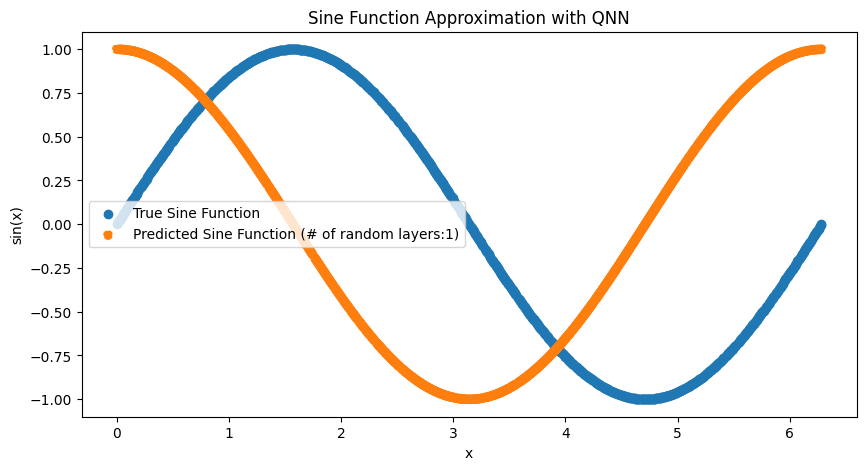

Number of layers: 2
Epoch 20: Cost = 1.0782
Epoch 40: Cost = 0.7950
Epoch 60: Cost = 0.4531
Epoch 80: Cost = 0.4465
Epoch 100: Cost = 0.4464


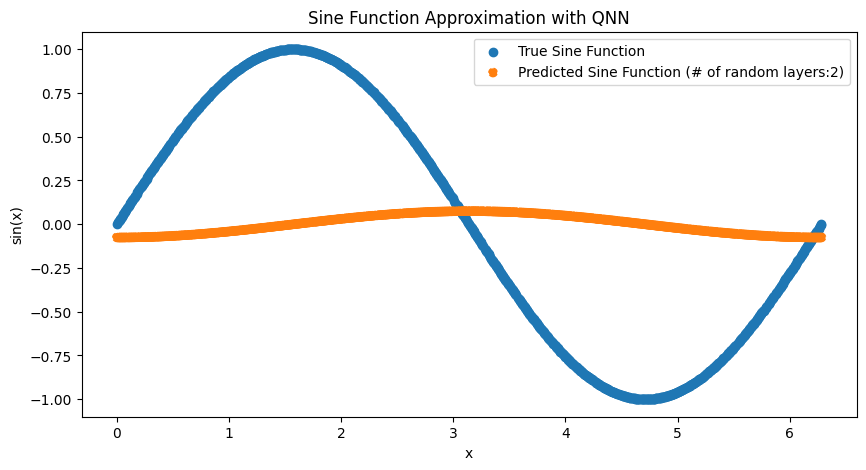

Number of layers: 3
Epoch 20: Cost = 0.7068
Epoch 40: Cost = 0.4464
Epoch 60: Cost = 0.4464
Epoch 80: Cost = 0.4464
Epoch 100: Cost = 0.4464


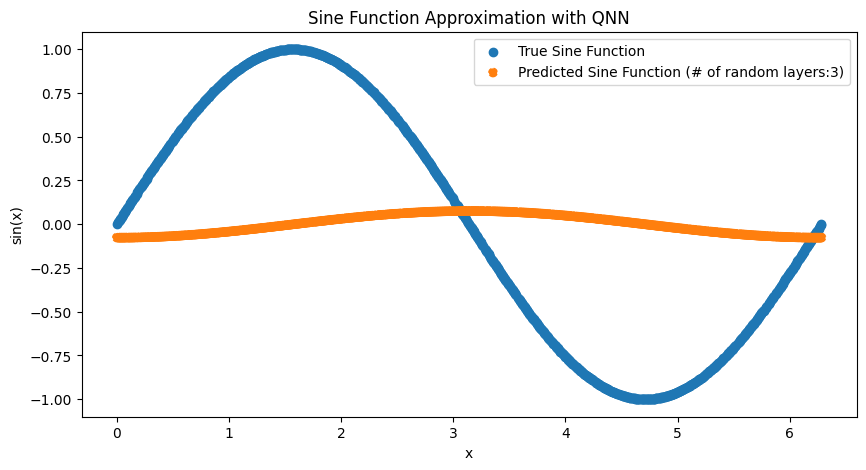

Number of layers: 4
Epoch 20: Cost = 0.0291
Epoch 40: Cost = 0.0003
Epoch 60: Cost = 0.0000
Epoch 80: Cost = 0.0000
Epoch 100: Cost = 0.0000


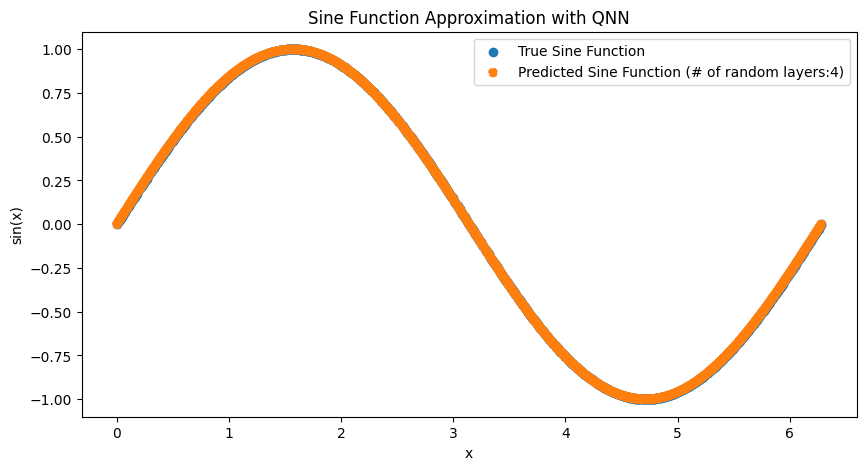

Number of layers: 5
Epoch 20: Cost = 0.0002
Epoch 40: Cost = 0.0000
Epoch 60: Cost = 0.0000
Epoch 80: Cost = 0.0000
Epoch 100: Cost = 0.0000


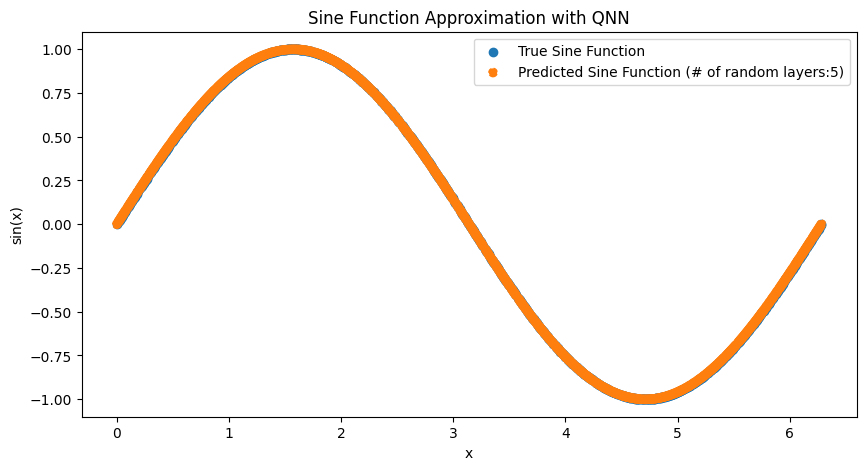

In [22]:
for l in n_layers:

    print(f"Number of layers: {l+1}")

    params = 0.01 * np.random.randn(l, n_qubits)

    # Train the model
    for epoch in range(n_epochs):
        params, cost_val = opt.step_and_cost(lambda v: cost(v, x_train, y_train), params)

        if (epoch + 1) % 20 == 0:
            print(f"Epoch {epoch + 1}: Cost = {cost_val:.4f}")

    # Testing
    # Predict using the trained QNN
    y_pred = [qnn_circuit(params, x_i) for x_i in x_test]

    # Plot the results
    plt.figure(figsize=(10, 5))
    plt.scatter(x_test, y_test, label='True Sine Function')
    plt.scatter(x_test, y_pred, label= f'Predicted Sine Function (# of random layers:{l+1})', linestyle='dashed')
    plt.title('Sine Function Approximation with QNN')
    plt.xlabel('x')
    plt.ylabel('sin(x)')
    plt.legend()
    plt.show()

It is observed from above that 4 or 5 random layers are enough for model to learn sine function.